In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
import seaborn as sns
sns.set_theme()

In [2]:
train_df = pd.read_csv("data/train.csv")

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


<AxesSubplot:xlabel='target'>

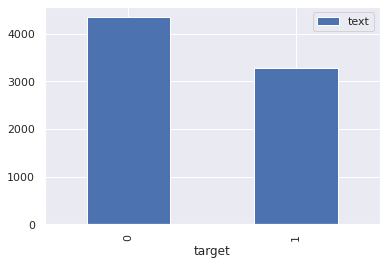

In [113]:
train_df.groupby('target', as_index=False).count()[['target', 'text']].plot.bar('target', 'text')

<AxesSubplot:ylabel='Frequency'>

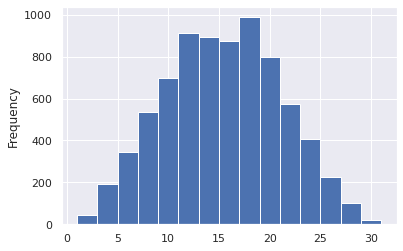

In [67]:
train_df['text'].apply(lambda s: len(s.split())).plot.hist(bins=15)

## Mots les plus utilisés pour chaque type de tweet

In [45]:
import re

def clean_text(
    string: str, 
    punctuations: str = r'''!()-[]{};:'"\,<>./?@#$%^&*_~|''',
    stop_words: list = ['the', 'a', 'and', 'is', 'be', 'will']) -> str:
    """
    A method to clean text 
    """
    # Cleaning the urls
    string = re.sub(r'https?://\S+|www\.\S+', '', string)

    # Cleaning the html elements
    string = re.sub(r'<.*?>', '', string)

    # Removing the punctuations
    for x in string.lower(): 
        if x in punctuations: 
            string = string.replace(x, "") 

    # Converting the text to lower
    string = string.lower()

    # Removing stop words
    string = ' '.join([word for word in string.split() if word not in stop_words])

    # Cleaning the whitespaces
    string = re.sub(r'\s+', ' ', string).strip()

    return string        

In [46]:
from nltk.stem.snowball import EnglishStemmer
import nltk
from nltk.corpus import stopwords

# nltk.download('punkt')
# nltk.download('stopwords')

sw = stopwords.words('english') + ['the', 'a', 'and', 'is', 'be', 'will']
stemmer = EnglishStemmer()

train_df['clean_text'] = train_df['text'].apply(clean_text, stop_words=sw)
train_df['tokens'] = train_df['clean_text'].apply(nltk.word_tokenize)
train_df['stems'] = train_df['tokens'].apply(lambda tokens: [stemmer.stem(w) for w in tokens])

In [56]:
from collections import Counter

df = train_df.loc[train_df['target'] == 0, 'tokens']
all_words = ' '.join(df.str.join(' ').tolist()).split()
counter = Counter(all_words)

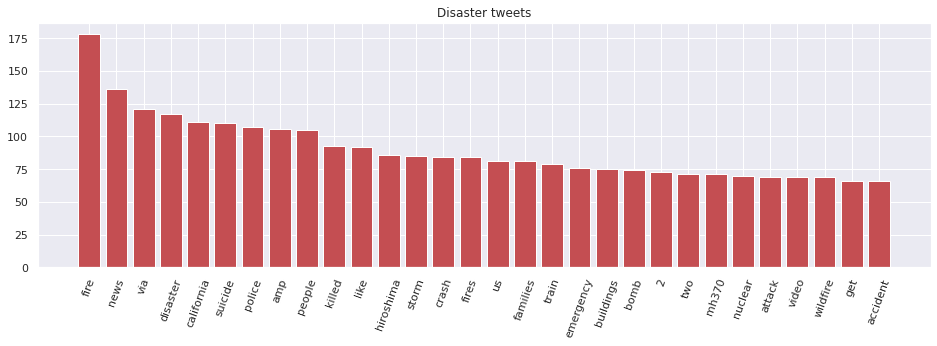

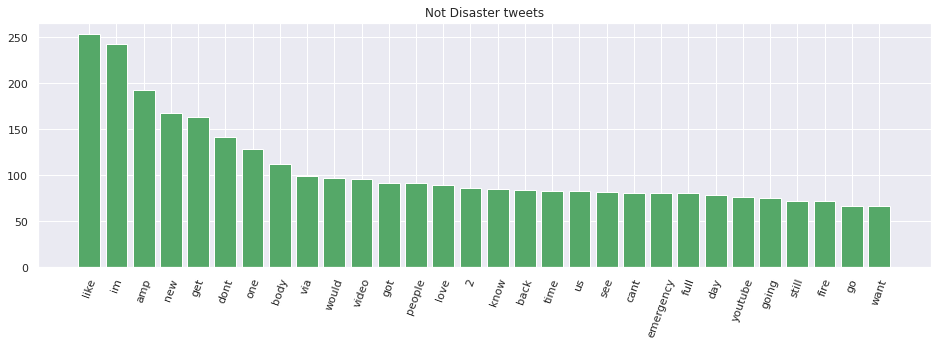

In [102]:
from collections import Counter

def get_most_common(nb, target):
    df = train_df.loc[train_df['target'] == target, 'tokens']
    all_words = ' '.join(df.str.join(' ').tolist()).split()
    counter = Counter(all_words)
    most_common = np.array(counter.most_common(nb))
    return most_common

most_common = get_most_common(30, 1)
plt.figure(figsize=(16, 4.5))
plt.bar(most_common[:, 0], most_common[:, 1].astype(int), color='r')
plt.title('Disaster tweets')
plt.xticks(rotation=70)
plt.show()

most_common = get_most_common(30, 0)
plt.figure(figsize=(16, 4.5))
plt.bar(most_common[:, 0], most_common[:, 1].astype(int), color='g')
plt.title('Not Disaster tweets')
plt.xticks(rotation=70)
plt.show()